## Exploratory Data Analysis

1. [currentOpenInspections.csv](#currentopeninspectionscsv)
2. []

**Open_Restaurant_Applications__Historic__20231202.csv**

Column information for this dataset can be found in [Open_Restaurant_Applications_Historical_Data_Dictionary.xlsx](data/Open_Restaurant_Applications_Historical_Data_Dictionary.xlsx)

In [21]:
import jellyfish as jf
import pandas as pd

from enum import Enum


class ColumnType(Enum):
    CONTINUOUS = 1
    CATEGORICAL = 2
    OTHER = 3

In [22]:
df_cur = pd.read_csv('data/raw/2_OpenRestaurantInspections.csv')
df_doh = pd.read_csv('data/raw/3_RestaurantInspections.csv')
df_ope = pd.read_csv('data/raw/1_OpenRestaurantInspections.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/1_OpenRestaurantInspections.csv'

In [ ]:
summary_data = [df_cur.shape, df_doh.shape, df_ope.shape]
df_summary = pd.DataFrame(summary_data, columns=['Rows', 'Columns'], index=[
                          'currentOpenInspections', 'DOHMH_New_York_City_Restaurant_Inspection_Results_20231202', 'Open_Restaurant_Applications__Historic__20231202'])
print(df_summary)

                                                      Rows  Columns
currentOpenInspections                               79203       20
DOHMH_New_York_City_Restaurant_Inspection_Resul...  209789       27
Open_Restaurant_Applications__Historic__20231202     14428       35


In [ ]:
def summarize_column(column: pd.Series, type: ColumnType, large_category: bool = False):
    '''
    This function returns information about the column based on the type
    '''

    if type == ColumnType.CATEGORICAL and not large_category:
        print('Total Count: ', len(column))
        print('Unique:', column.unique(), 'Count: ', len(column.unique()))
        print(column.value_counts())
        print('Type', column.dtype)
        print('Null count: ', column.isnull().sum())
        column.value_counts().plot(kind='pie')
    elif type == ColumnType.CATEGORICAL and large_category:
        print('Total Count: ', len(column))
        print('Unique Count: ', len(column.unique()))
        print('Type', column.dtype)
        print('Null count: ', column.isnull().sum())
    elif type == ColumnType.CONTINUOUS:
        print('Total Count: ', len(column))
        print('Null count: ', column.isnull().sum())
        print(column.describe())



### currentOpenInspections.csv

Column information for this dataset can be found in [Data_Dictionary_-_Open_Restaurants_Inspections.xlsx](data/Data_Dictionary_-_Open_Restaurants_Inspections.xlsx). Note that the columns listed in the sheet matching until *ZIPCode* which is actually named *Postcode*. In addition there are 8 extra columns not listed: Latitude, Longitude, CommunityBoard, CouncilDistrict, CensusTract, BIN, BBL, NTA. The meanings of these could probably be extracted from the other .xlsx files.

**Summary**: This dataset contains sidewalk compliance information where compliance is determined by OpenStreet. Each row indicates a seperate inspection that was performed at a restaraunt. Restaurants can be inspected more than once.

**Data Cleaning**:

* Delete current IsSidewayCompliant and rename IsRoadwayCompliant to IsSidewayCompliant

In [23]:
summarize_column(df_cur['BBL'], ColumnType.CONTINUOUS, large_category=True)

Total Count:  79203
Null count:  8304
count    7.089900e+04
mean     2.167645e+09
std      1.240291e+09
min      0.000000e+00
25%      1.008370e+09
50%      2.023990e+09
75%      3.041460e+09
max      5.080430e+09
Name: BBL, dtype: float64


**Question** Is there a non-null Skipped Reason value only when *IsRoadwayCompliant* is equal to 'Skipped Intersection'?

Yes.

In [24]:
((df_cur['IsRoadwayCompliant'] == 'Skipped Inspection') == df_cur['SkippedReason'].notnull()).sum() == len(df_cur)

True

**Question**: Are there the same number of distinct *BusinessAddress*, *RestaurantName*, and *LegalBusinessName*?

No.

In [25]:
print('Unique Values')
print('-------------')
print('# Business Addresses:', len(df_cur['BusinessAddress'].unique()))
print('# Restaurant Names:', len(df_cur['RestaurantName'].unique()))
print('# Legal Business Names:', len(df_cur['LegalBusinessName'].unique()))

print('\nNull Values')
print('-----------')
print('# Business Addresses:', df_cur['BusinessAddress'].isnull().sum())
print('# Restaurant Names:', df_cur['RestaurantName'].isnull().sum())
print('# Legal Business Names:', df_cur['LegalBusinessName'].isnull().sum())

Unique Values
-------------
# Business Addresses: 10600
# Restaurant Names: 9839
# Legal Business Names: 10288

Null Values
-----------
# Business Addresses: 0
# Restaurant Names: 8
# Legal Business Names: 1


Notes:

* It would make sense if there were more restaurants than business addresses as there could be new restaraunts that start at the same location.
* Could also be that the same restaraunt has multiple locations
* The number of restaraunt names and legal business names don't match. There are more legal business names suggesting that there are matching errors

**Question**: Is latitude Null wherever longitude is NULL?

Yes.

In [26]:
(df_cur['Latitude'].isnull() == df_cur['Longitude'].isnull()).sum() == len(df_cur)

True

**Question**: Where Latitude, Longitude, CommunityBoard, CouncilDistrict, CensusTract, BIN, BBL, NTA all merged in a single `JOIN` to the rest of the data?

Yes.
 
* Latitude, Longitude, CommunityBoard, CouncilDistrict, CensusTract, and NTA have the same null values
* BIN and BBL have the same null values
* Where Latitude..NTA are NULL, are BIN and BBL also always NULL

In [27]:
if (df_cur['Latitude'].isnull() == df_cur['Longitude'].isnull()).sum() == len(df_cur) and \
(df_cur['Latitude'].isnull() == df_cur['CommunityBoard'].isnull()).sum() == len(df_cur) and \
(df_cur['Latitude'].isnull() == df_cur['CouncilDistrict'].isnull()).sum() == len(df_cur) and \
(df_cur['Latitude'].isnull() == df_cur['CensusTract'].isnull()).sum() == len(df_cur) and \
(df_cur['Latitude'].isnull() == df_cur['NTA'].isnull()).sum() == len(df_cur):
    print('Latitude, Longitude, CommunityBoard, CouncilDistrict, CensusTract, and NTA have the same null values')

if (df_cur['BIN'].isnull() == df_cur['BBL'].isnull()).sum() == len(df_cur):
    print('BIN and BBL have the same null values')

print('\nNull Values')
print('-----------')
print('# Latitude:', df_cur['Latitude'].isnull().sum())
print('# Longitude:', df_cur['Longitude'].isnull().sum())
print('# Community Board:', df_cur['CommunityBoard'].isnull().sum())
print('# Council District:', df_cur['CouncilDistrict'].isnull().sum())
print('# Census Tract:', df_cur['CensusTract'].isnull().sum())
print('# BIN:', df_cur['BIN'].isnull().sum())
print('# BBL:', df_cur['BBL'].isnull().sum())
print('# NTA:', df_cur['NTA'].isnull().sum())

Latitude, Longitude, CommunityBoard, CouncilDistrict, CensusTract, and NTA have the same null values
BIN and BBL have the same null values

Null Values
-----------
# Latitude: 7883
# Longitude: 7883
# Community Board: 7883
# Council District: 7883
# Census Tract: 7883
# BIN: 8304
# BBL: 8304
# NTA: 7883


In [28]:
print(len(df_cur[df_cur['Latitude'].isnull()].index.union(df_cur[df_cur['BIN'].isnull()].index)) == df_cur['BIN'].isnull().sum())
print(len(df_cur[df_cur['Latitude'].isnull()].index.union(df_cur[df_cur['BBL'].isnull()].index)) == df_cur['BBL'].isnull().sum())

True
True


**Question**: Is there anything interesting about the name (e.g. food truck) for those that do not have a CommunityBoard, NTA etc..? What about those that have a CommunityBoard, NTA, but no BIN or BBL?

Doesn't seem like it. See the image.


In [29]:
# Sample rows that have null values for Latitude
df_cur[df_cur['Latitude'].isnull()].sample(10)[['BusinessAddress', 'LegalBusinessName', 'RestaurantName']]

,BusinessAddress,LegalBusinessName,RestaurantName
32074,103 havemeter street,Vabeh first llc,Havemeyer Vineria naturale con cucina
32425,1619 2ND AVENUE,GREEN 84 LLC,GREEN 84 LLC
8846,109 -09 Liberty Ave South Richmond Hill,Gt Kingston Diner Inc,GT KINGSTON DINER
78437,2 Berry,Aging young rebels llc,Upstate Stock
21063,1375/67 2 E 61st Street,"IHMS,LLC",Hotel Pierre
75765,237 237 Third Avenue,Pataiden Food & Drink,Paddy Maguire's Ale House (Bar)
18825,39 04 64,Sumnima Kitchen,Sumnima Kitchen
21638,666 Seneca a e,Balcon de quito restaurant inc,Balcon de quito restaurant inc
49611,1666 93rd St 3rd ave,Isohama Japanese Restaurant (NY) INC,Isohama
31388,32 - 41 Steinway,Caso Inc,MamaGCOs empanadas


In [30]:
df_cur[df_cur['BIN'].isnull()].sample(10)[['BusinessAddress', 'LegalBusinessName', 'RestaurantName']]

,BusinessAddress,LegalBusinessName,RestaurantName
72272,136 W 46,Margin restaurant Corp,Margin restaurant corp
42213,250 Mott,Boba Fix Inc.,Boba Fix
26065,239 239 West Broadway,DBA Corton LLC,Batard
22302,FRNT 1 2 W 32nd Street,Young Mandoo Corp,Kushi Kushi Yaki
11686,170 Allen,Mr Taka LLC,Mr Taka Ramen
7877,265 east 78,Pil Pil spanish tapas inc,Pil pil spanish tapas
63218,85 E 125th,"Ginjan Bros, LLC",Ginjan Cafe
20553,254W 108th street,"Himalayan Curry House, Inc.",Himalayan Curry House
68459,355 E78,Three Spoons LLC,Maison Bangkok
51522,255 Bleecker,La Cornelia,Tacombi


![Don Pollo](assets/don_pollo.png)

**Question**: Could CensusTract be of type int?

In [31]:
(df_cur[df_cur['CensusTract'].notnull()]['CensusTract'].astype(int) == df_cur[df_cur['CensusTract'].notnull()]['CensusTract']).sum() == len(df_cur[df_cur['CensusTract'].notnull()])

True

**Question** Are the NTA neighborhoods truly unique, or are some misspelled?

Yes, it looks like each of the neighborhoods is truly unique and correct without any misspellings. The closest neighborhood is usually by swapping East with West or North with South.

In [32]:
# For each unique neighborhood in NTA, find the closest matching neighborhood using Levenshtein distance. Report those that have a distance less than 3.

for neighborhood in df_cur[df_cur['NTA'].notnull()]['NTA'].unique():
    for other_neighborhood in df_cur[df_cur['NTA'].notnull()]['NTA'].unique():
        if neighborhood != other_neighborhood and jf.levenshtein_distance(neighborhood, other_neighborhood) < 3:
            print('Neighborhood:', neighborhood, '| Other:', other_neighborhood)

Neighborhood: West Village | Other: East Village
Neighborhood: East Village | Other: West Village
Neighborhood: Bushwick North | Other: Bushwick South
Neighborhood: Bensonhurst West | Other: Bensonhurst East
Neighborhood: Bensonhurst East | Other: Bensonhurst West
Neighborhood: Sunset Park East | Other: Sunset Park West
Neighborhood: Crown Heights North | Other: Crown Heights South
Neighborhood: Washington Heights North | Other: Washington Heights South
Neighborhood: East Harlem South | Other: East Harlem North
Neighborhood: Bushwick South | Other: Bushwick North
Neighborhood: Sunset Park West | Other: Sunset Park East
Neighborhood: Washington Heights South | Other: Washington Heights North
Neighborhood: East Harlem North | Other: East Harlem South
Neighborhood: Crown Heights South | Other: Crown Heights North


**Question**: Can you show an example of a spelling error in restaraunt name?

* Capitalization: Sam Won Garden | Sam won Garden
* White space: Mama sushi | Mamasushi
* Keyboard typos: Rocatone Seafood Restaraunt | Roxatone Seafood Restaraunt

In [33]:
# Group by Postcode and for each group, find a business that is mispelled with a Levenshtein distance of 1 or 2.

count = 0

for postcode in df_cur[df_cur['Postcode'].notnull()]['Postcode'].unique():
    for restaurant in df_cur[df_cur['Postcode'] == postcode]['RestaurantName'].unique():
        
        if pd.isnull(restaurant):
            continue
        
        for other_restaurant in df_cur[df_cur['Postcode'] == postcode]['RestaurantName'].unique():

            if pd.isnull(other_restaurant):
                continue

            if restaurant != other_restaurant and jf.levenshtein_distance(restaurant, other_restaurant) < 2:
                print('Restaurant:', restaurant, '| Other:', other_restaurant)
                count += 1

        if count >= 5:
            break

print('Total:', count)


Restaurant: Sam Won Garden | Other: Sam won Garden
Restaurant: Sam won Garden | Other: Sam Won Garden
Restaurant: Osteria 57 | Other: Osteria57
Restaurant: Osteria57 | Other: Osteria 57
Restaurant: PEPEROSSO TO GO | Other: PEPE ROSSO TO GO
Restaurant: pig n whistle | Other: Pig n whistle
Restaurant: Mama sushi | Other: Mamasushi
Restaurant: ROCATONE SEAFOOD RESTAURANT | Other: ROXATONE SEAFOOD RESTAURANT
Total: 8


**Question** Is there a concept of a business address shared across multiple restaraunt / branch locations?

Observations:
* Not all McDonald's are owned by the same legal business e.g. *McDonald's Restaurant of New York INC.* vs *MCCONNER STREET HOLDING, LLC*
* Some franchises have multiple locations. *MCCONNER STREET HOLDING, LLC* has at least two broadway locations.

Action: Group by Legal Business Name, then location then inspection per location.

In [34]:
# Display 10 rows where the restaraunt is McDonald's. Display the Restaraunt Name, Legal Business Name, and Business Address.

# Normalize restaraunt name
col_restaurant_name = df_cur['RestaurantName']

# - remove spacing and from restaraunt name
col_restaurant_name = col_restaurant_name.str.replace(' ', '')

# - remove punctuation (',-) from RestaurantName
col_restaurant_name = col_restaurant_name.str.replace(
    ',', '').str.replace("'", '')

# - to lowercase
col_restaurant_name = col_restaurant_name.str.lower()

# Sample rows containing mcdonalds
mcdonalds_in_ny = df_cur[col_restaurant_name.str.contains(
    'mcdonalds').replace(pd.NA, False)][['RestaurantName', 'LegalBusinessName', 'BusinessAddress']]

print("Number of McDonald's in NY:", len(mcdonalds_in_ny))
mcdonalds_in_ny.sample(10)

Number of McDonald's in NY: 72


,RestaurantName,LegalBusinessName,BusinessAddress
8590,MCDONALD'S,D S D SYSTEMS INC/MCDONALD'S,3660 EAST TREMONT AVENUE
1783,McDonalds,946 Eighth Ave Food Corp,946 8th ave
58451,Mcdonalds,LA Products and Services Corp,2154 Nostrand ave
11819,MCDONALD'S,"SDJR SYSTEMS 1, LLC",208 DYCKMAN STREET
38331,Mcdonalds,LA Products and Services Corp,2154 Nostrand ave
16615,McDonald's Restaurant of New York INC.,McDonald's Restaurant of New York INC.,789/42 556 7TH AVE
10815,McDonald's,P. Hendel Products Partnership,289 9th Street
23592,Mcdonalds,LA Products and Services Corp,2154 Nostrand ave
61817,McDonalds,"MIC-EASTCHESTER, LLC",1826 Eastchester Road
25286,Mcdonalds,LA Products and Services Corp,2154 Nostrand ave


In [35]:
df_cur.iloc[[58452, 24751]]

,Borough,RestaurantName,SeatingChoice,LegalBusinessName,BusinessAddress,RestaurantInspectionID,IsSidewayCompliant,IsRoadwayCompliant,SkippedReason,InspectedOn,AgencyCode,Postcode,Latitude,Longitude,CommunityBoard,CouncilDistrict,CensusTract,BIN,BBL,NTA
58452,Brooklyn,Mcdonalds,both,LA Products and Services Corp,2154 Nostrand ave,63892,NaN,Pre-Suspension,NaN,08/26/2021 11:40:48 AM,DOT,11210,40.632428,-73.947655,14.0,45.0,774.0,3205892.0,3.075570e+09,Flatbush
24751,Brooklyn,Mcdonalds,both,LA Products and Services Corp,2154 Nostrand ave,23884,NaN,Skipped Inspection,No Seating,09/24/2020 01:45:52 PM,DOT,11210,40.632428,-73.947655,14.0,45.0,774.0,3205892.0,3.075570e+09,Flatbush


### DOHMH_New_York_City_Restaraunt_Inspection_Results_20231202.csv

Column information for this dataset can be found in [RestaurantInspectionDataDictionary_09242018.xlsx](data/RestaurantInspectionDataDictionary_09242018.xlsx). Note that there are columns in addition to the ones described in the sheet: Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1.

In [36]:
summarize_column(df_doh['CUISINE DESCRIPTION'], ColumnType.CATEGORICAL, large_category=True)

Total Count:  209789
Unique Count:  90
Type object
Null count:  2424


1. Does not seem like there is a lot of quality data when the *Doing Business As* column is empty.

In [37]:
df_doh[df_doh['DBA'].isnull()].sample(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
498,50120946,NaN,Manhattan,385,5 AVENUE,10016.0,9176014161,NaN,01/01/1900,NaN,...,NaN,40.749556,-73.983726,105.0,4.0,8200.0,1017134.0,1.008650e+09,MN20,NaN
69424,50144307,NaN,Manhattan,218,WEST 23 STREET,10011.0,2125181813,NaN,01/01/1900,NaN,...,NaN,40.744419,-73.996442,104.0,3.0,9100.0,1014130.0,1.007720e+09,MN13,NaN
172571,50143347,NaN,Queens,18518,HILLSIDE AVE,11432.0,9178604544,NaN,01/01/1900,NaN,...,NaN,40.714309,-73.776860,412.0,23.0,48000.0,4212799.0,4.099330e+09,QN61,NaN
159,50142591,NaN,Manhattan,232,WEST 14 STREET,10011.0,3479875444,NaN,01/01/1900,NaN,...,NaN,40.738993,-74.000761,102.0,3.0,7700.0,1011102.0,1.006180e+09,MN23,NaN
162718,50128130,NaN,Brooklyn,2504B,FLATBUSH AVE,11234.0,3479930857,NaN,01/01/1900,NaN,...,NaN,40.609223,-73.921868,318.0,46.0,66200.0,NaN,3.000000e+00,BK45,NaN


**Question** Are there any *NaN* values in INSPECTION DATE? How many dates are 1/1/1900?

In [38]:
summarize_column(df_doh['INSPECTION DATE'], ColumnType.CATEGORICAL, large_category=True)

Total Count:  209789
Unique Count:  1675
Type object
Null count:  0


In [39]:
(df_doh['INSPECTION DATE'] == '01/01/1900').sum()

2424

In [40]:
summarize_column(df_doh['SCORE'], ColumnType.CONTINUOUS, large_category=False)

Total Count:  209789
Null count:  9996
count    199793.000000
mean         22.843053
std          17.554237
min           0.000000
25%          11.000000
50%          19.000000
75%          31.000000
max         168.000000
Name: SCORE, dtype: float64


<Axes: ylabel='Frequency'>

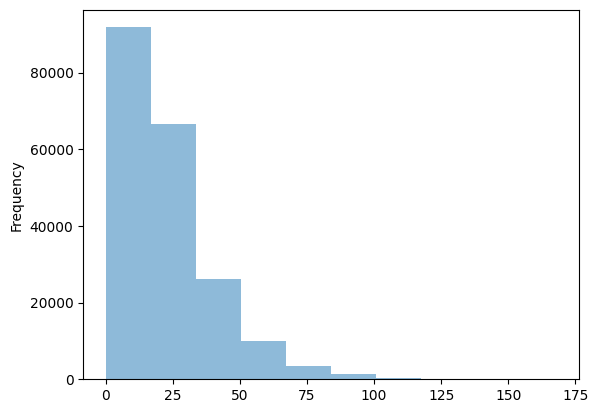

In [41]:
df_doh['SCORE'].plot.hist(alpha=0.5)

In [42]:
# Check if all the values in Score could be converted to int
(df_doh[df_doh['SCORE'].notnull()]['SCORE'].astype(int) ==
 df_doh[df_doh['SCORE'].notnull()]['SCORE']).sum() == len(df_doh[df_doh['SCORE'].notnull()])

True

In [43]:
# Summarize record date
summarize_column(df_doh['GRADE DATE'], ColumnType.CONTINUOUS, large_category=True)


Total Count:  209789
Null count:  115581
count          94208
unique          1449
top       12/01/2022
freq             350
Name: GRADE DATE, dtype: object


In [44]:
# Convert from str to datetime
print(df_doh['GRADE DATE'].astype('datetime64[ns]').min())
print(df_doh['GRADE DATE'].astype('datetime64[ns]').max())

2015-09-24 00:00:00
2023-11-29 00:00:00


Total Count:  209789
Unique: [nan 'Inter-Agency Task Force / Initial Inspection'
 'Cycle Inspection / Initial Inspection'
 'Administrative Miscellaneous / Re-inspection'
 'Pre-permit (Operational) / Initial Inspection'
 'Smoke-Free Air Act / Limited Inspection'
 'Cycle Inspection / Reopening Inspection'
 'Cycle Inspection / Re-inspection'
 'Administrative Miscellaneous / Initial Inspection'
 'Pre-permit (Non-operational) / Initial Inspection'
 'Pre-permit (Operational) / Compliance Inspection'
 'Pre-permit (Operational) / Re-inspection'
 'Smoke-Free Air Act / Re-inspection'
 'Smoke-Free Air Act / Initial Inspection'
 'Trans Fat / Initial Inspection'
 'Pre-permit (Operational) / Reopening Inspection'
 'Cycle Inspection / Compliance Inspection'
 'Calorie Posting / Initial Inspection'
 'Administrative Miscellaneous / Reopening Inspection'
 'Trans Fat / Re-inspection'
 'Pre-permit (Operational) / Second Compliance Inspection'
 'Pre-permit (Non-operational) / Re-inspection'
 'Administrative

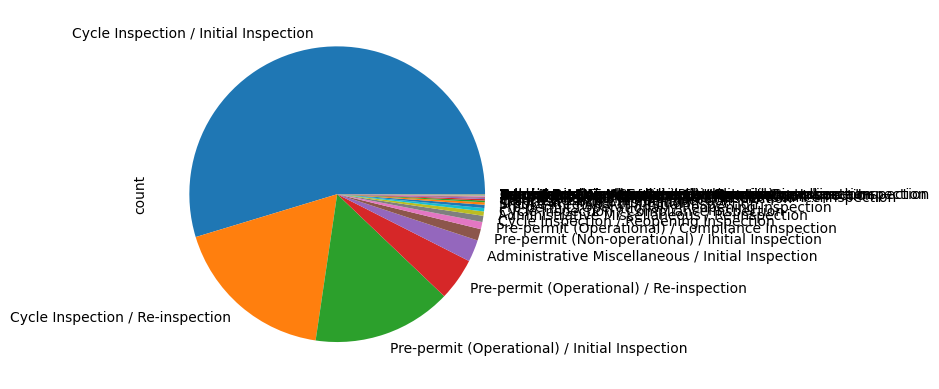

In [45]:
# Summarize and sample the actions
# summarize_column(df_doh['VIOLATION CODE'], ColumnType.CATEGORICAL, large_category=False)
summarize_column(df_doh['INSPECTION TYPE'], ColumnType.CATEGORICAL, large_category=False)

**Question**: Is CAMIS (restaurant permit) per branch / location or for the whole busines?

In [46]:
# Display 10 rows where the restaraunt is McDonald's.

# Normalize restaraunt name
col_restaurant_name = df_doh['DBA']

# - remove spacing and from restaraunt name
col_restaurant_name = col_restaurant_name.str.replace(' ', '')

# - remove punctuation (',-) from RestaurantName
col_restaurant_name = col_restaurant_name.str.replace(
    ',', '').str.replace("'", '')

# - to lowercase
col_restaurant_name = col_restaurant_name.str.lower()

# Sample rows containing mcdonalds
mcdonalds_in_ny = df_doh[col_restaurant_name.str.contains(
    'mcdonalds').replace(pd.NA, False)][['CAMIS', 'DBA', 'STREET']]

print("Number of McDonald's in NY:", len(mcdonalds_in_ny))
mcdonalds_in_ny.sample(10)

Number of McDonald's in NY: 1202


,CAMIS,DBA,STREET
166799,50033277,MCDONALD'S,MERRICK BLVD
98071,40391639,MCDONALD'S,BRUCKNER BOULEVARD
65964,50010254,MCDONALD'S,31ST ST
20210,41603147,MCDONALD'S,WEBSTER AVENUE
188101,40395910,MCDONALD'S,NORTHERN BOULEVARD
141786,50070471,MCDONALDS # 18093,WEST 125 STREET
203514,50068988,MCDONALD'S #13068,CONEY ISLAND AVENUE
108959,40369782,MCDONALD'S,UTICA AVENUE
86358,41241627,MCDONALD'S,UNIVERSITY AVENUE
163943,50044989,MCDONALD'S,BROADWAY


In [58]:
data = {'Business': ['A', 'B', 'A', 'C', 'B', 'A', 'C'],
        'Value': [10, 20, 30, 40, 50, 60, 70]}
df = pd.DataFrame(data)

# Group by the 'Business' column
grouped = df.groupby('Business')

# Iterate through each group
for business, group_df in grouped:
    print(f"Business: {business}")
    print(group_df)

    for index, row in group_df.iterrows():
        print(index)

Business: A
  Business  Value
0        A     10
2        A     30
5        A     60
0
2
5
Business: B
  Business  Value
1        B     20
4        B     50
1
4
Business: C
  Business  Value
3        C     40
6        C     70
3
6
